ЗАВДАННЯ 2. Розробити за допомогою бібліотеки surprise рекомендаційну систему.
Використати датасет movielens-100k
Використайте алгоритми SVD, SVDpp.
Найкращі параметри для всіх алгоритмів підберіть за допомогою кросвалідації.
Обчисліть середнє значення середньоквадратичної помилки RMSE для
кожного алгоритму на основі результатів крос-валідації.
Виберіть оптимальний алгоритм. Зробіть візуалізацію.
Зробіть висновки.

In [13]:
#!pip install scikit-surprise

import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise import SVD, SVDpp
import matplotlib.pyplot as plt

1. Визначаємо reader для бібліотеки Surprise


In [14]:
reader = Reader(line_format='user item rating timestamp', sep='\t', rating_scale=(1, 5))

2. Завантаження датасету за допомогою reader


In [15]:
data = Dataset.load_from_file('/content/u.data', reader=reader)

3. Визначаємо алгоритми


In [16]:
svd_algorithm = SVD()
svdpp_algorithm = SVDpp()

4. а) Виконання крос-валідації для SVD


In [17]:
svd_cv_results = cross_validate(svd_algorithm, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9445  0.9282  0.9340  0.9332  0.9359  0.9352  0.0053  
Fit time          1.77    1.94    2.64    1.84    1.80    2.00    0.32    
Test time         0.19    0.43    0.25    0.30    0.15    0.26    0.10    


б) Виконання крос-валідації для SVDpp


In [9]:
svdpp_cv_results = cross_validate(svdpp_algorithm, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9149  0.9127  0.9245  0.9149  0.9299  0.9194  0.0067  
Fit time          28.35   29.03   28.38   28.34   32.69   29.36   1.68    
Test time         4.82    6.20    4.78    4.90    4.90    5.12    0.54    


5. Обчислення середнього значення середньоквадратичної помилки RMSE для кожного алгоритму:


In [10]:
avg_rmse_svd = svd_cv_results['test_rmse'].mean()
avg_rmse_svdpp = svdpp_cv_results['test_rmse'].mean()

6. Виведення середнього значення середньоквадратичної помилки RMSE для кожного алгоритму:

In [11]:
print(f'Середньє значення середньоквадратичної помилки RMSE для SVD: {avg_rmse_svd}')
print(f'Середньє значення середньоквадратичної помилки RMSE для SVDpp: {avg_rmse_svdpp}')

Середньє значення середньоквадратичної помилки RMSE для SVD: 0.9361003181426082
Середньє значення середньоквадратичної помилки RMSE для SVDpp: 0.9193760791105564


7. Візуалізація результатів


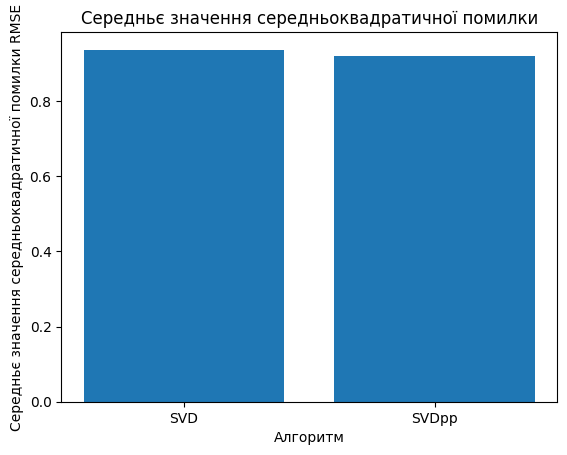

SVDpp - є оптимальним алгоритмом


In [12]:
plt.bar(['SVD', 'SVDpp'], [avg_rmse_svd, avg_rmse_svdpp])
plt.title('Середньє значення середньоквадратичної помилки')
plt.xlabel('Алгоритм')
plt.ylabel('Середньє значення середньоквадратичної помилки RMSE')
plt.show()

if avg_rmse_svd < avg_rmse_svdpp:
    print('SVD - є оптимальним алгоритмом')
else:
    print('SVDpp - є оптимальним алгоритмом')

ВИСНОВОК. Розроблено за допомогою бібліотеки surprise рекомендаційну систему за використанням датасету movielens-100k та алгоритмів SVD, SVDpp. Найкращі параметри для всіх алгоритмів підібрані за допомогою крос-валідації.
 Обчислено середнє значення середньоквадратичної помилки RMSE для кожного алгоритму на основі результатів крос-валідації та зроблено візуалізацію.
З усіх виконаних кроків можу зробити висновок, що алгоритм SVD є оптимальнішим.
